#### Import Required Libraries

In [75]:
# Basic packages
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display


# Data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Import models and evaluation tools
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, roc_curve, auc
from sklearn.metrics import RocCurveDisplay

# `1. Data Cleaning and Preprocessing`

#### `1.1 Load the Dataset`


In [76]:
# Load dataset
df = pd.read_csv("heart_cleveland.csv")
df.rename(columns={'condition': 'target'}, inplace=True)


#### `1.2 Display first 5 rows`

In [77]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


#### `1.3 Examine Data Structure`

In [78]:
# Check data info
df.info()

print("----------------------------------\n----------------------------------")

# Summary statistics
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    int64  
 1   sex       297 non-null    int64  
 2   cp        297 non-null    int64  
 3   trestbps  297 non-null    int64  
 4   chol      297 non-null    int64  
 5   fbs       297 non-null    int64  
 6   restecg   297 non-null    int64  
 7   thalach   297 non-null    int64  
 8   exang     297 non-null    int64  
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    int64  
 11  ca        297 non-null    int64  
 12  thal      297 non-null    int64  
 13  target    297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB
----------------------------------
----------------------------------


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


#### `1.4 Check for missing values`


In [79]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

#### `1.5 Split data into train/test sets`

In [80]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = df.drop('target', axis=1)
y = df['target']

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# stratify=y ensures class distribution is maintained in both train and test sets.

# Check class distribution to confirm stratification
y_train.value_counts(normalize=True), y_test.value_counts(normalize=True)

(target
 0    0.540084
 1    0.459916
 Name: proportion, dtype: float64,
 target
 0    0.533333
 1    0.466667
 Name: proportion, dtype: float64)

#### `1.6 Scale features (very important for k-NN and SVM)`

In [81]:
# Initialize scaler
scaler = StandardScaler()

# Fit only on training data
X_train_scaled = scaler.fit_transform(X_train)

# Apply (transform) the same scaler on test data
X_test_scaled = scaler.transform(X_test)

# `2. Exploratory Data Analysis (EDA)`

#### `2.1 Summary statistics grouped by target`

In [82]:
# Summary statistics grouped by target
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,52.643750,0.556250,1.793750,129.175000,243.493750,0.143750,0.843750,158.581250,0.143750,0.598750,0.412500,0.275000,0.375000
1,56.759124,0.817518,2.583942,134.635036,251.854015,0.145985,1.175182,139.109489,0.540146,1.589051,0.824818,1.145985,1.372263


This table shows the average values of each feature for patients **with (1)** and **without (0)** heart disease.  
For example, patients with heart disease tend to have a higher average cholesterol level and lower max heart rate achieved.  
This helps us understand which features differ between the two groups and may be important for prediction.

#### `2.2 Class distribution`


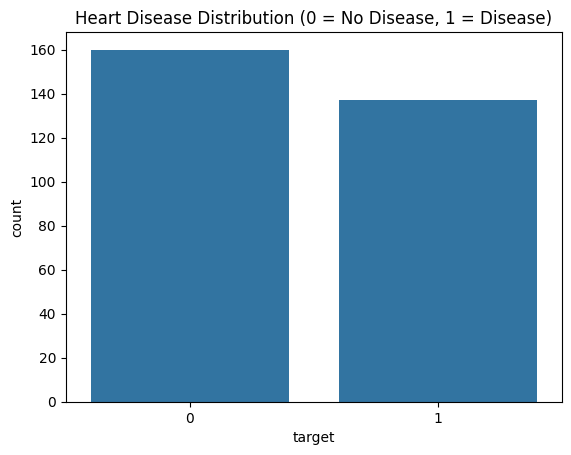

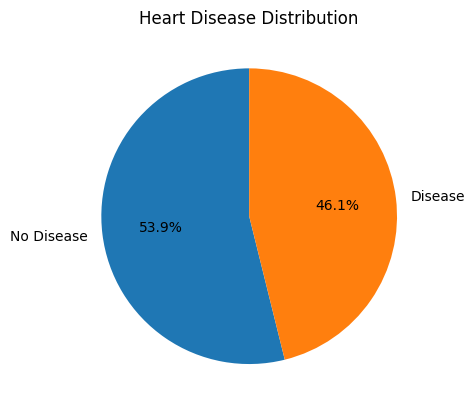

In [83]:
# Check how many 0's and 1's in the target variable
df['target'].value_counts()
# Plot class distribution
sns.countplot(x='target', data=df)
plt.title('Heart Disease Distribution (0 = No Disease, 1 = Disease)')
plt.show()

# Pie chart of class distribution
df['target'].value_counts().plot.pie(autopct='%1.1f%%', labels=['No Disease', 'Disease'], startangle=90)
plt.title('Heart Disease Distribution')
plt.ylabel('')
plt.show()

#### `2.3 Correlation matrix of features`

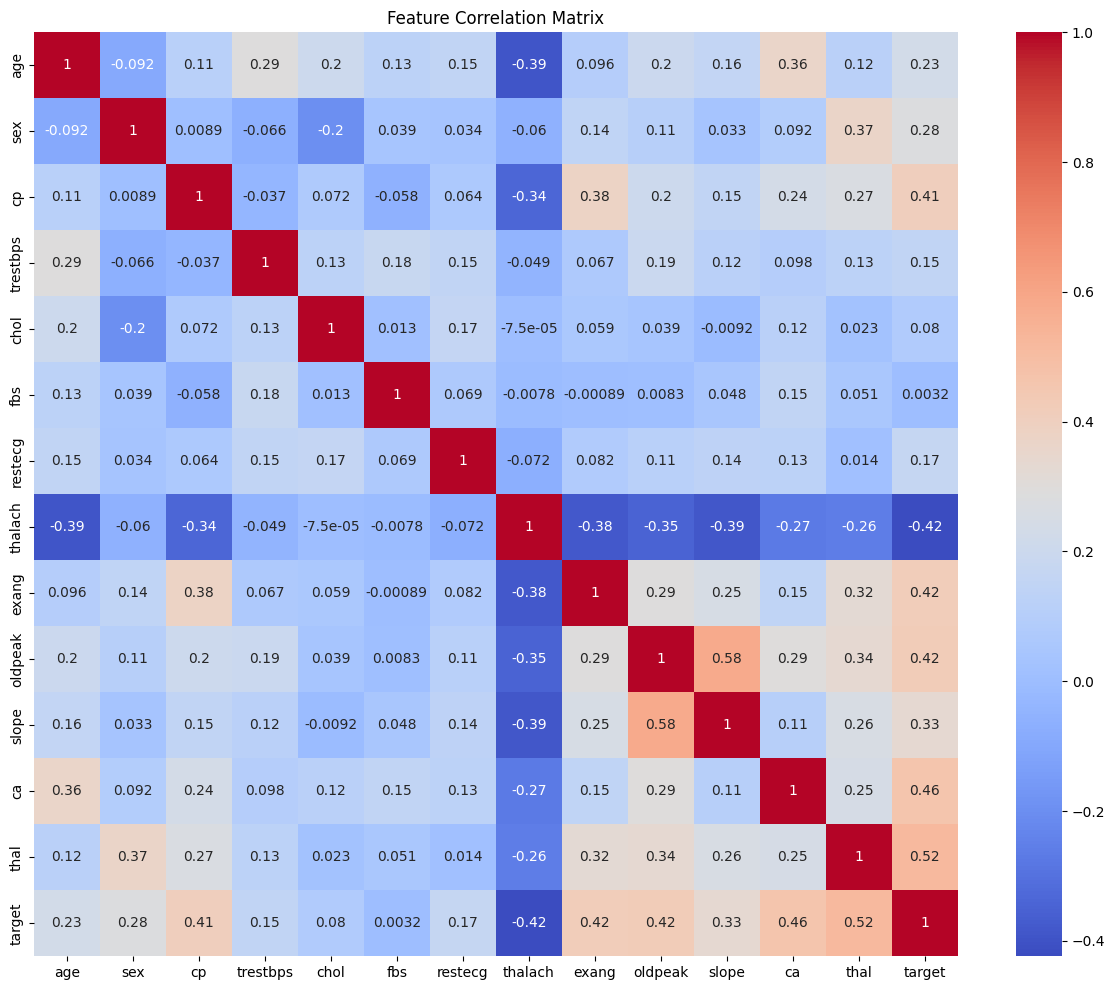

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.092399,0.110471,0.290476,0.202644,0.132062,0.149917,-0.394563,0.096489,0.197123,0.159405,0.362210,0.120795,0.227075
sex,-0.092399,1.000000,0.008908,-0.066340,-0.198089,0.038850,0.033897,-0.060496,0.143581,0.106567,0.033345,0.091925,0.370556,0.278467
cp,0.110471,0.008908,1.000000,-0.036980,0.072088,-0.057663,0.063905,-0.339308,0.377525,0.203244,0.151079,0.235644,0.266275,0.408945
trestbps,0.290476,-0.066340,-0.036980,1.000000,0.131536,0.180860,0.149242,-0.049108,0.066691,0.191243,0.121172,0.097954,0.130612,0.153490
chol,0.202644,-0.198089,0.072088,0.131536,1.000000,0.012708,0.165046,-0.000075,0.059339,0.038596,-0.009215,0.115945,0.023441,0.080285
fbs,0.132062,0.038850,-0.057663,0.180860,0.012708,1.000000,0.068831,-0.007842,-0.000893,0.008311,0.047819,0.152086,0.051038,0.003167
restecg,0.149917,0.033897,0.063905,0.149242,0.165046,0.068831,1.000000,-0.072290,0.081874,0.113726,0.135141,0.129021,0.013612,0.166343
thalach,-0.394563,-0.060496,-0.339308,-0.049108,-0.000075,-0.007842,-0.072290,1.000000,-0.384368,-0.347640,-0.389307,-0.268727,-0.258386,-0.423817
exang,0.096489,0.143581,0.377525,0.066691,0.059339,-0.000893,0.081874,-0.384368,1.000000,0.289310,0.250572,0.148232,0.323268,0.421355
oldpeak,0.197123,0.106567,0.203244,0.191243,0.038596,0.008311,0.113726,-0.347640,0.289310,1.000000,0.579037,0.294452,0.336809,0.424052


In [84]:
# Compute correlation matrix
corr = df.corr()

# Heatmap of correlations
plt.figure(figsize=(15,12))
sns.heatmap(corr, annot=True, cmap='coolwarm', square=True)
plt.title('Feature Correlation Matrix')
plt.show()

# AS TABLE
# Correlation matrix as text
corr_matrix = df.corr(numeric_only=True)

display(corr_matrix)

#### `2.4 Top correlated features with target`

 helps identify which features might be useful for models and which might not.

target      1.000000
thal        0.520516
ca          0.463189
oldpeak     0.424052
exang       0.421355
cp          0.408945
slope       0.333049
sex         0.278467
age         0.227075
restecg     0.166343
trestbps    0.153490
chol        0.080285
fbs         0.003167
thalach    -0.423817
Name: target, dtype: float64


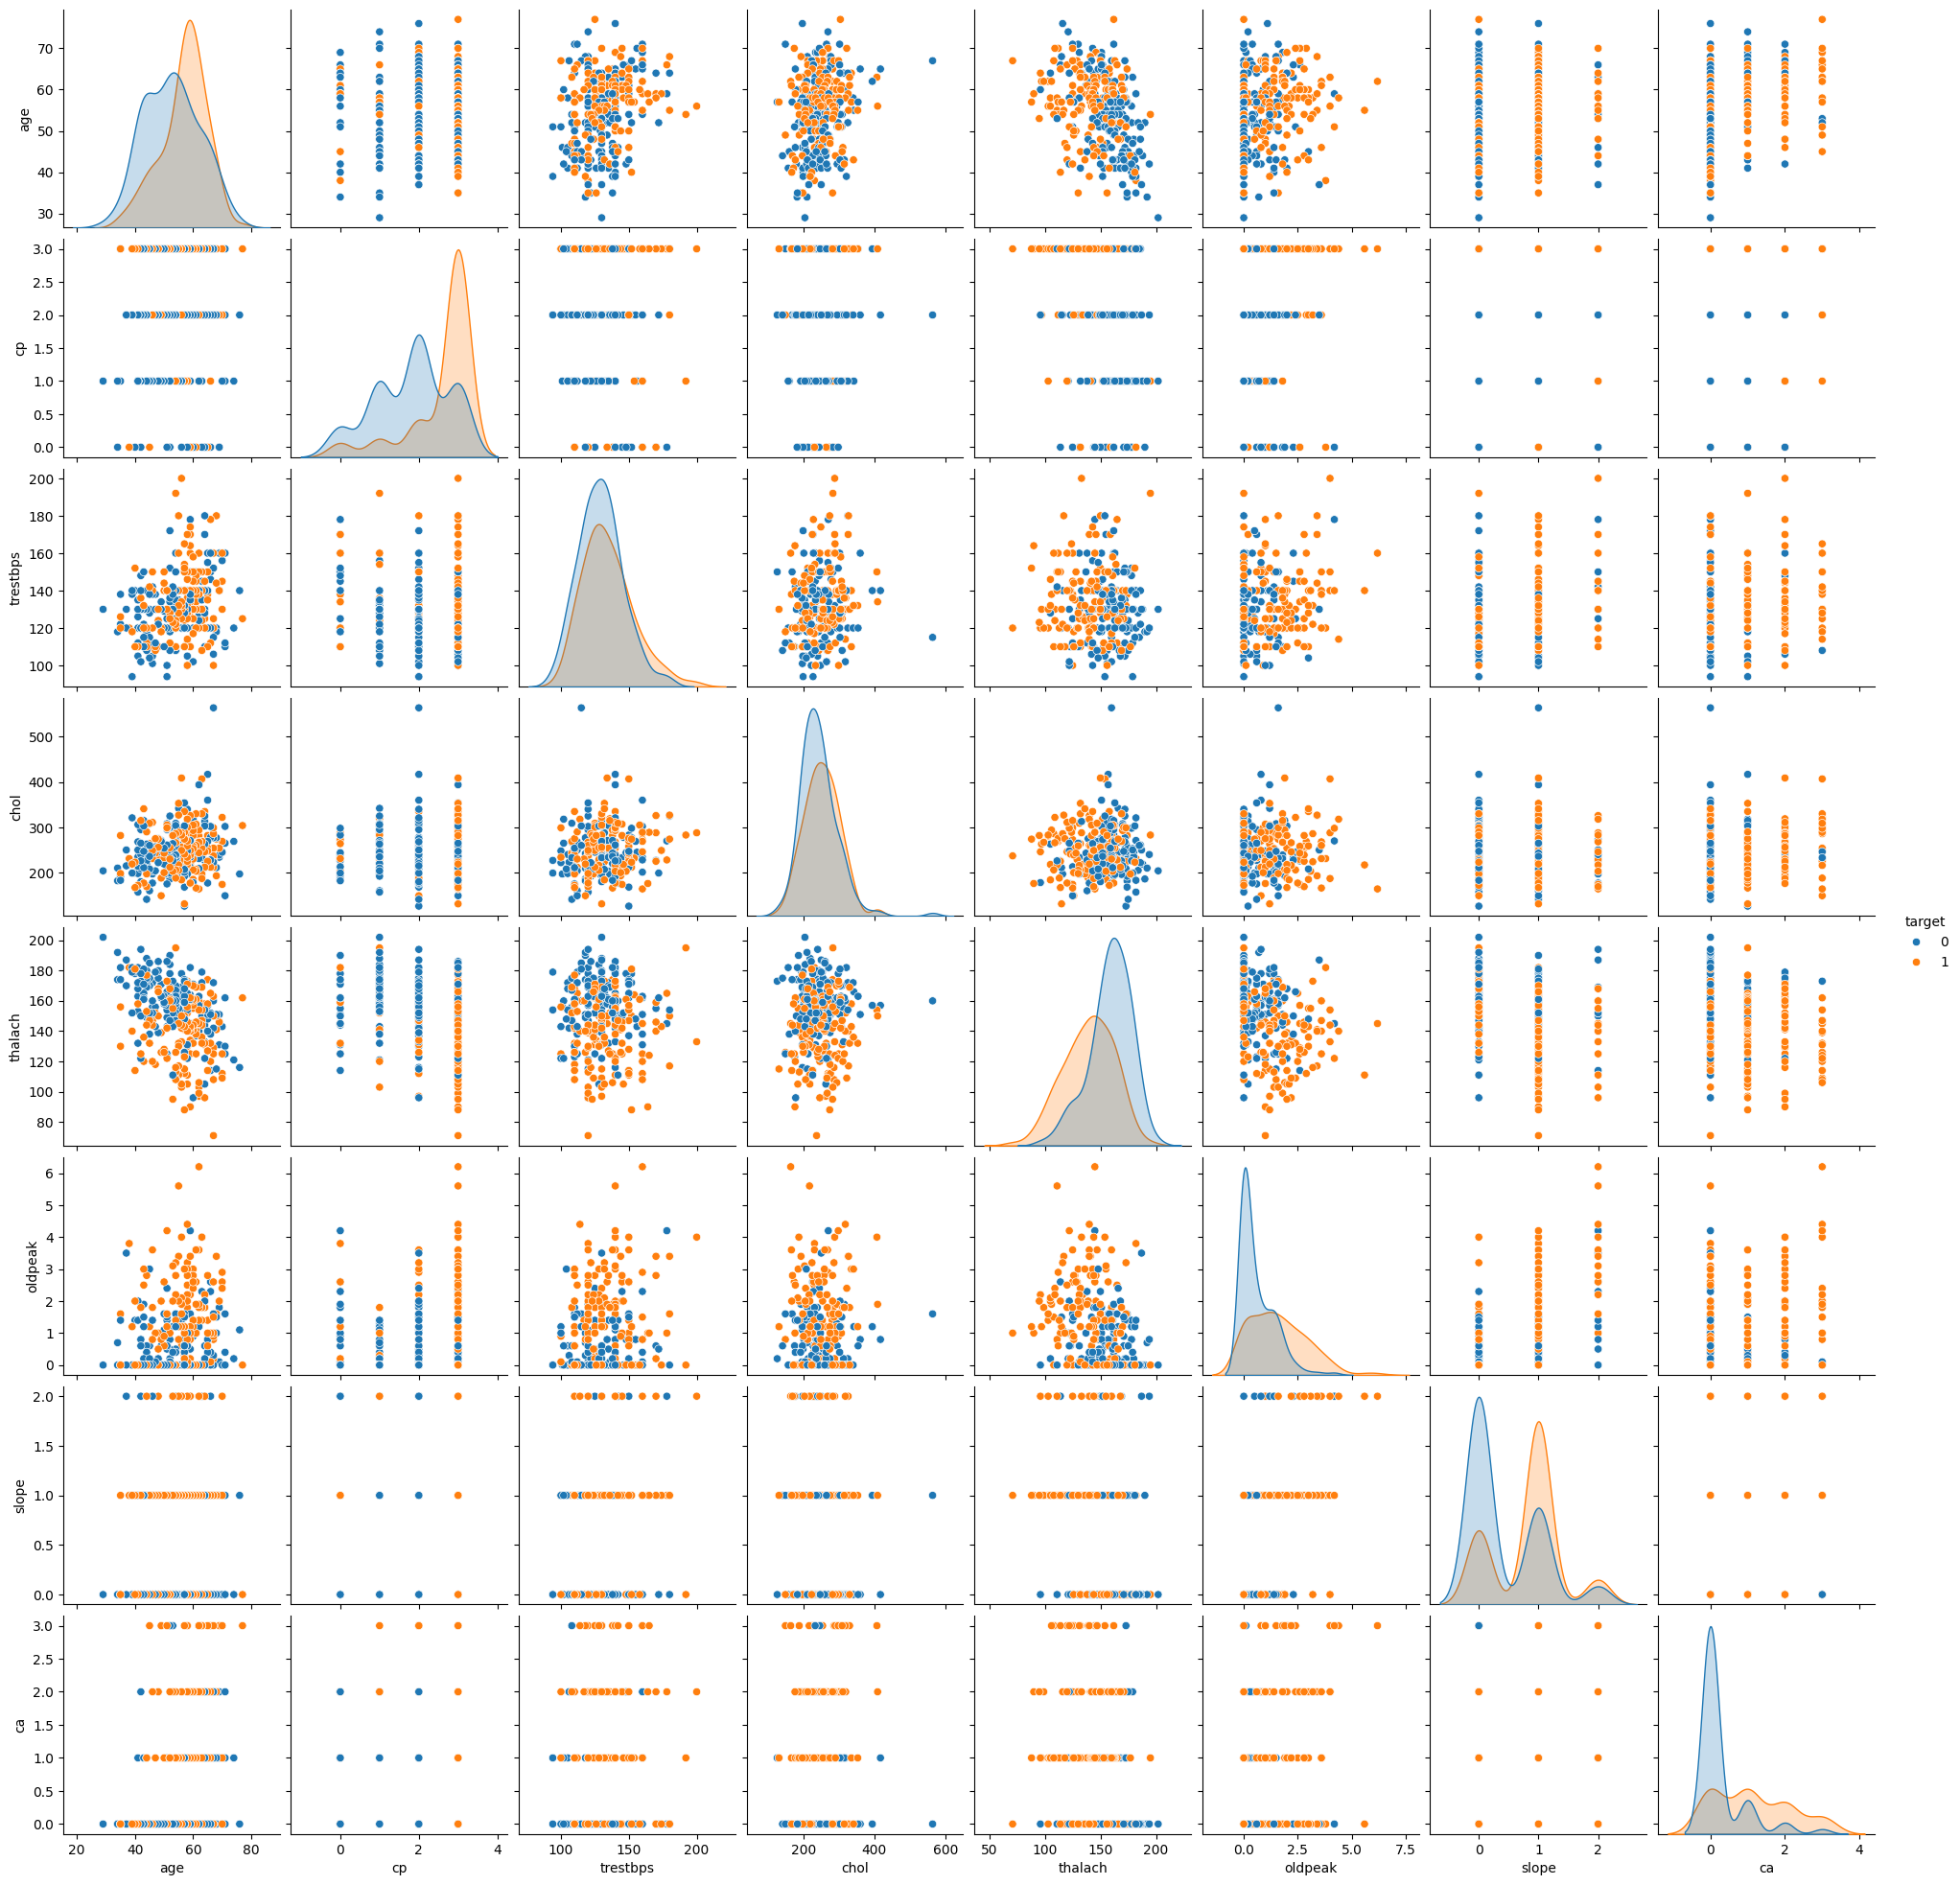

In [85]:
# Correlation with target column
corr_target = corr['target'].sort_values(ascending=False)
print(corr_target)

# Visualize pairwise relationships (with hue as target)
sns.pairplot(df[['age','cp', 'trestbps', 'chol', 'thalach', 'oldpeak','slope', 'ca', 'target']], hue='target')
plt.show()

This pairplot shows scatterplots and distributions for selected features, colored by the target class (heart disease presence).  
- Diagonal plots display each feature’s distribution.  
- Off-diagonal plots show how pairs of features relate "correlated" and separate the two classes.  

It helps visually identify patterns, correlations, and differences between patients with and without heart disease.

#### `2.6 Patterns and Anomalies Observed`

- Patients with heart disease (target=1) generally have **higher average age, cholesterol, and resting blood pressure** compared to those without (target=0).
- Features like `thalach` (max heart rate achieved) tend to be **lower** in patients with heart disease.
- Some features such as `cp` (chest pain type) and `slope` show distinct groupings that could help differentiate classes.
- Overlaps exist in several features, indicating some complexity in separating classes perfectly.
- A few outliers or unusual values appear in features like `oldpeak` and `ca` that might require further inspection.

# `3. Feature Selection / Engineering`

#### `3.1 Drop features with very low correlation to target`

in the next cell we remove fbs , because it have very very low correlation with the target,,, and as demonstration we add a new feature "just for practice" we will remove the new feature in the next cell

In [86]:
# Drop features with very low correlation to target (threshold chosen as abs(corr) < 0.05)
low_corr_features = ['fbs']  # fbs correlation ~0.003 is very low

# Drop these columns from dataset
df_selected_with_new = df.drop(columns=low_corr_features)

# Optional: Create a new feature (age * resting blood pressure)
df_selected_with_new['age_trestbps'] = df_selected_with_new['age'] * df_selected_with_new['trestbps']

# Show remaining features after drop and new feature creation
print("Selected features after dropping low-correlation columns and adding new feature:")
print(df_selected_with_new.columns.tolist())

df_selected_with_new.head()

Selected features after dropping low-correlation columns and adding new feature:
['age', 'sex', 'cp', 'trestbps', 'chol', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target', 'age_trestbps']


,age,sex,cp,trestbps,chol,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_trestbps
0,69,1,0,160,234,2,131,0,0.1,1,1,0,0,11040
1,69,0,0,140,239,0,151,0,1.8,0,2,0,0,9660
2,66,0,0,150,226,0,114,0,2.6,2,0,0,0,9900
3,65,1,0,138,282,2,174,0,1.4,1,1,0,1,8970
4,64,1,0,110,211,2,144,1,1.8,1,0,0,0,7040


here we `remove` the new added feature


In [87]:
new_feature = ['age_trestbps']  # fbs correlation ~0.003 is very low

# Drop these columns from dataset
df_selected = df_selected_with_new.drop(columns=new_feature)


# Show remaining features after drop and new feature creation
print("Selected features after dropping low-correlation columns and adding new feature:")
print(df_selected.columns.tolist())

df_selected.head()

Selected features after dropping low-correlation columns and adding new feature:
['age', 'sex', 'cp', 'trestbps', 'chol', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']


,age,sex,cp,trestbps,chol,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,69,1,0,160,234,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,2,144,1,1.8,1,0,0,0


#### `3.2 Remove redundant or Highly Correlated Feature Pairs`

We can also drop features that have a high correlation with each other, for example, above **0.8**. Highly correlated features carry redundant information, which can affect the model's performance. 

However, based on the correlation matrix we inspected, there doesn't appear to be any feature pairs with a correlation above **0.8**. To be certain, we can write code to automatically check for such pairs.

**Example:**  
If `feature A` and `feature B` have a correlation of **0.90**, we may keep one and remove the other.

In [88]:
# Select upper triangle of correlation matrix (to avoid duplicate pairs)
upper = corr_matrix.where(
    np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
)

# Find features with correlation greater than 0.85
high_corr_pairs = [
    (column, row, corr_value)
    for column in upper.columns
    for row, corr_value in upper[column].items()
    if corr_value > 0.8
]

# Print the highly correlated feature pairs
if high_corr_pairs:
    print("Highly correlated feature pairs (corr > 0.8):")
    for col1, col2, corr_value in high_corr_pairs:
        print(f"{col1} and {col2} → {corr_value:.2f}")
else:
    print("No feature pairs with correlation greater than 0.8.")

No feature pairs with correlation greater than 0.8.


#  `4. Model Selection and Training`

The goal is to compare their performance and understand how well each model can predict the target class.

In this task, we'll train **four different classification models**:

- Logistic Regression  
- Decision Tree  
- k-Nearest Neighbors (k-NN)  
- Support Vector Machine (SVM)  

**Why these models?**

- **Logistic Regression**: Simple, interpretable, and a strong baseline for binary classification problems.
- **Decision Tree**: Captures non-linear relationships and is easy to visualize.
- **k-NN**: A non-parametric model that classifies based on the majority vote of neighbors.
- **SVM**: Effective in high-dimensional spaces and suitable for small to medium-sized datasets.
We previously split the dataset

#### `4.1 Initialize and Train Models`

In [103]:
# Initialize models
logreg = LogisticRegression(max_iter=1000)
dtree = DecisionTreeClassifier(random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)
svm = SVC(kernel='linear')

# Train models
logreg.fit(X_train, y_train)
dtree.fit(X_train, y_train)
#knn.fit(X_train, y_train)
#svm.fit(X_train, y_train)
knn.fit(X_train_scaled, y_train)
svm.fit(X_train_scaled, y_train)



display(logreg)
display(dtree)
display(knn)
display(svm)


LogisticRegression(max_iter=1000)

DecisionTreeClassifier(random_state=42)

KNeighborsClassifier()

SVC(kernel='linear')

# `5. Model Evaluation`

#### `5.1 Make Predictions on Test Set`

In [105]:
# Make predictions on test set
y_pred_logreg = logreg.predict(X_test)
y_pred_dtree = dtree.predict(X_test)
#y_pred_knn = knn.predict(X_test)
#y_pred_svm = svm.predict(X_test)
y_pred_knn = knn.predict(X_test_scaled)
y_pred_svm = svm.predict(X_test_scaled)


#### `5.2 Compute Evaluation Metrics`

In [106]:
# Store predictions and models in a dict
predictions = {
    'Logistic Regression': y_pred_logreg,
    'Decision Tree': y_pred_dtree,
    'k-NN': y_pred_knn,
    'SVM': y_pred_svm
}

# Store results
results = []

for name, y_pred in predictions.items():
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted')
    rec = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred)
    
    results.append({
        'Model': name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1-score': f1,
        'Confusion Matrix': cm
    })

#### `5.3 Display Evaluation Results in Table`

In [107]:
results_df = pd.DataFrame(results).drop(columns='Confusion Matrix')
results_df = results_df.round(5)
results_df

,Model,Accuracy,Precision,Recall,F1-score
0,Logistic Regression,0.91667,0.92793,0.91667,0.91560
1,Decision Tree,0.78333,0.78476,0.78333,0.78205
2,k-NN,0.90000,0.91579,0.90000,0.89829
3,SVM,0.90000,0.91579,0.90000,0.89829


#### `5.4 Plot confusion matrices (one per model)`

Confusion Matrix for Logistic Regression:


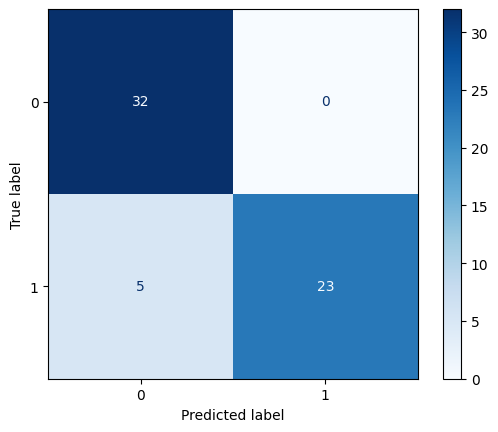

Confusion Matrix for Decision Tree:


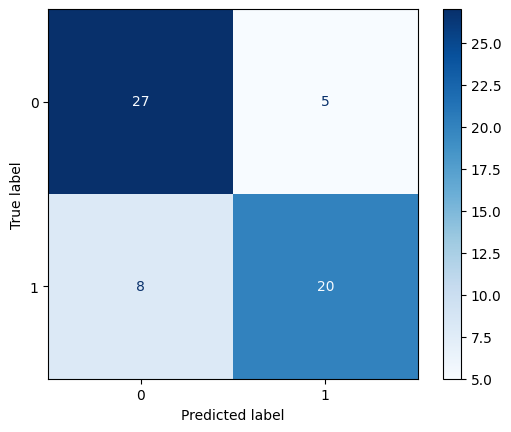

Confusion Matrix for k-NN:


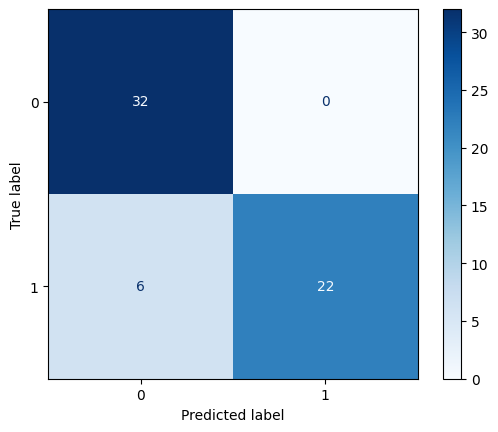

Confusion Matrix for SVM:


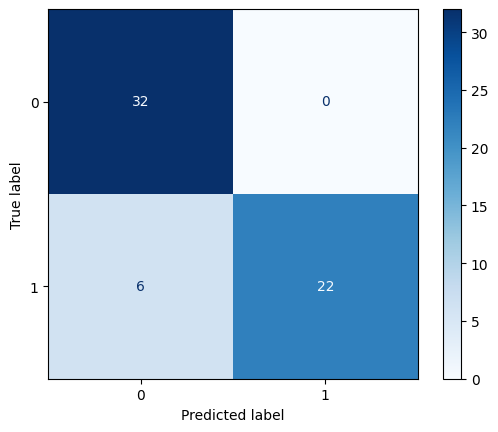

In [108]:
models = {
    'Logistic Regression': logreg,
    'Decision Tree': dtree,
    'k-NN': knn,
    'SVM': svm
}

for r in results:
    print(f"Confusion Matrix for {r['Model']}:")
    ConfusionMatrixDisplay(r['Confusion Matrix']).plot(cmap=plt.cm.Blues)
    plt.show()


#### `5.5 # ROC Curves for All Models`

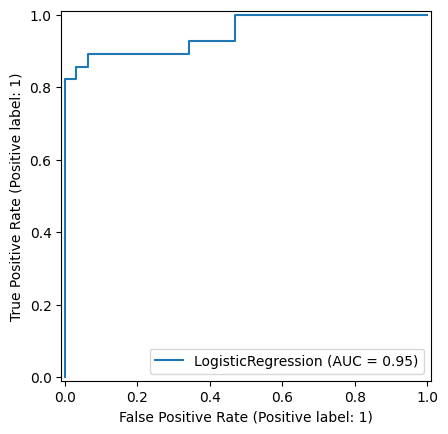

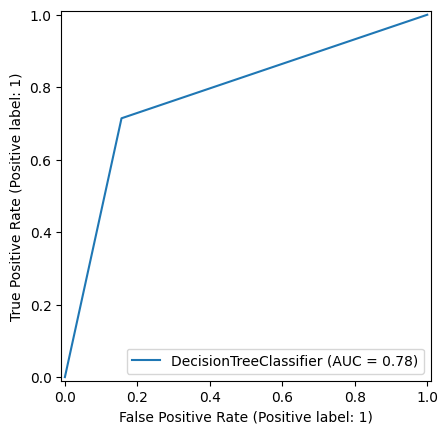

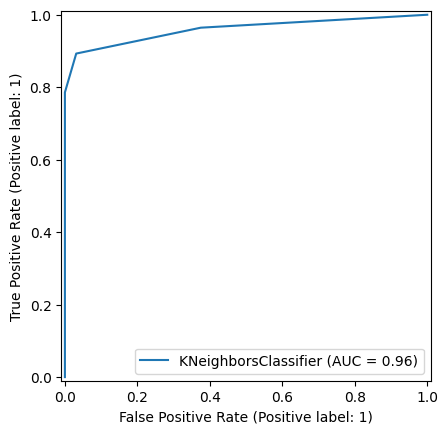

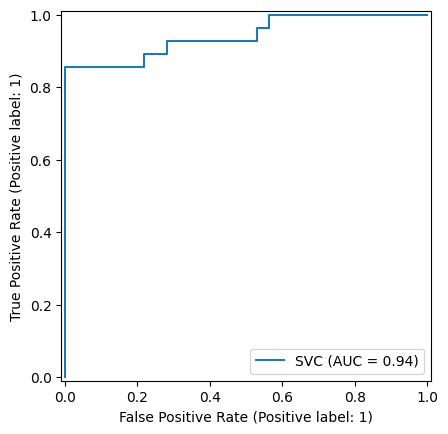

In [111]:
RocCurveDisplay.from_estimator(logreg, X_test, y_test)  # no scale needed
RocCurveDisplay.from_estimator(dtree, X_test, y_test)   # no scale needed
RocCurveDisplay.from_estimator(knn, X_test_scaled, y_test)
RocCurveDisplay.from_estimator(svm, X_test_scaled, y_test)


#### `5.6 Precision-Recall Curves for All Models`

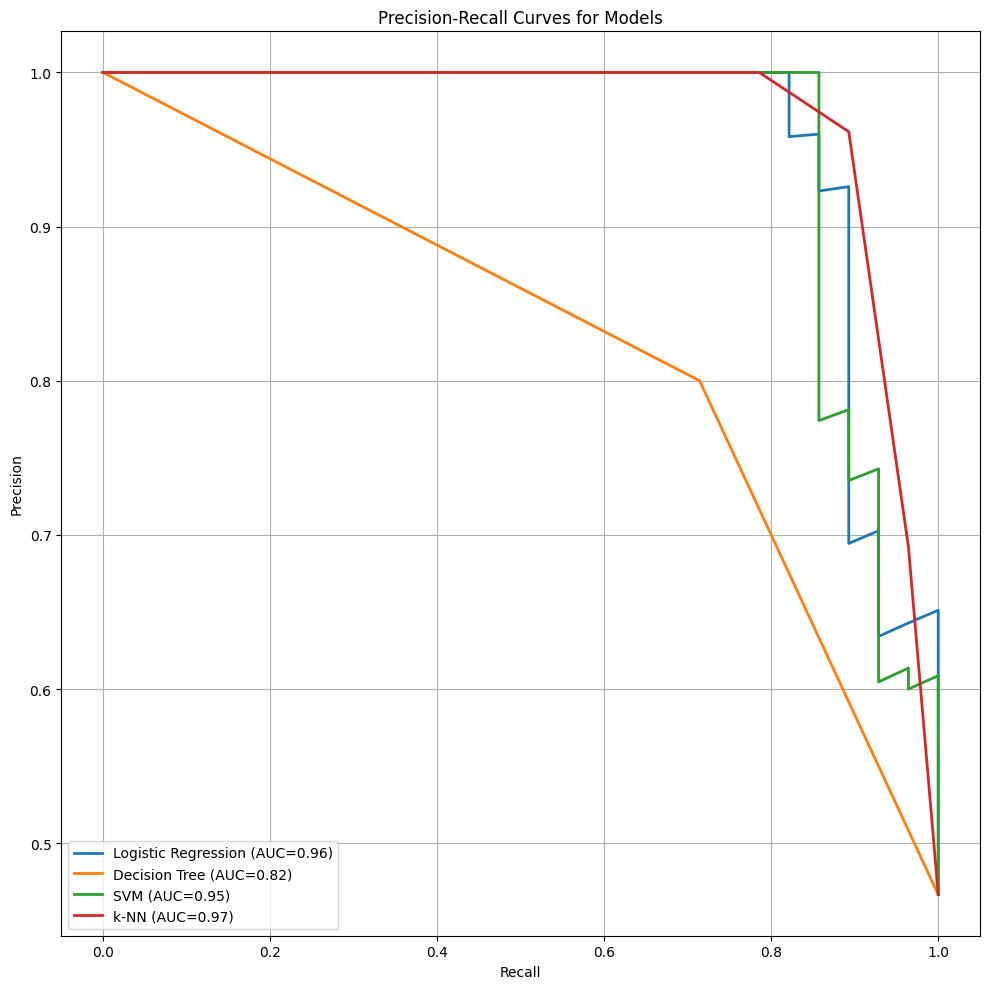

In [119]:
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

# Models dictionary
models = {
    'Logistic Regression': logreg,
    'Decision Tree': dtree,
    'SVM': svm,
    'k-NN': knn
}

plt.figure(figsize=(10, 10))

# Plot Precision-Recall curves manually
for name, model in models.items():
    # Use scaled test data for SVM and k-NN, else unscaled
    if name in ['SVM', 'k-NN']:
        X_eval = X_test_scaled
    else:
        X_eval = X_test
    
    # Use predict_proba or decision_function if available
    if hasattr(model, "predict_proba"):
        probas = model.predict_proba(X_eval)[:, 1]
    else:
        probas = model.decision_function(X_eval)
    
    precision, recall, _ = precision_recall_curve(y_test, probas)
    pr_auc = auc(recall, precision)
    
    plt.plot(recall, precision, label=f"{name} (AUC={pr_auc:.2f})", lw=2)

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curves for Models")
plt.grid(True)
plt.legend(loc="lower left")
plt.tight_layout()
plt.show()


#### `5.7 2D Visualization of features`

**Select Features**

In [120]:
# Select the first two features (columns) for visualization
X_train_2d = X_train.iloc[:, :2]
X_test_2d = X_test.iloc[:, :2]

**Train Models on 2D Data**

In [122]:
# Train the models again on 2D features
logreg_2d = LogisticRegression(max_iter=1000).fit(X_train_2d, y_train)
dtree_2d = DecisionTreeClassifier(random_state=42).fit(X_train_2d, y_train)
knn_2d = KNeighborsClassifier(n_neighbors=5).fit(X_train_2d, y_train)
svm_2d = SVC(kernel='linear', probability=True).fit(X_train_2d, y_train)

models_2d = {
    'Logistic Regression': logreg_2d,
    'Decision Tree': dtree_2d,
    'k-NN': knn_2d,
    'SVM': svm_2d
}

**Plot Decision Boundaries for Each Model**

c:\Users\BBY\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\BBY\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\BBY\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\Users\BBY\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


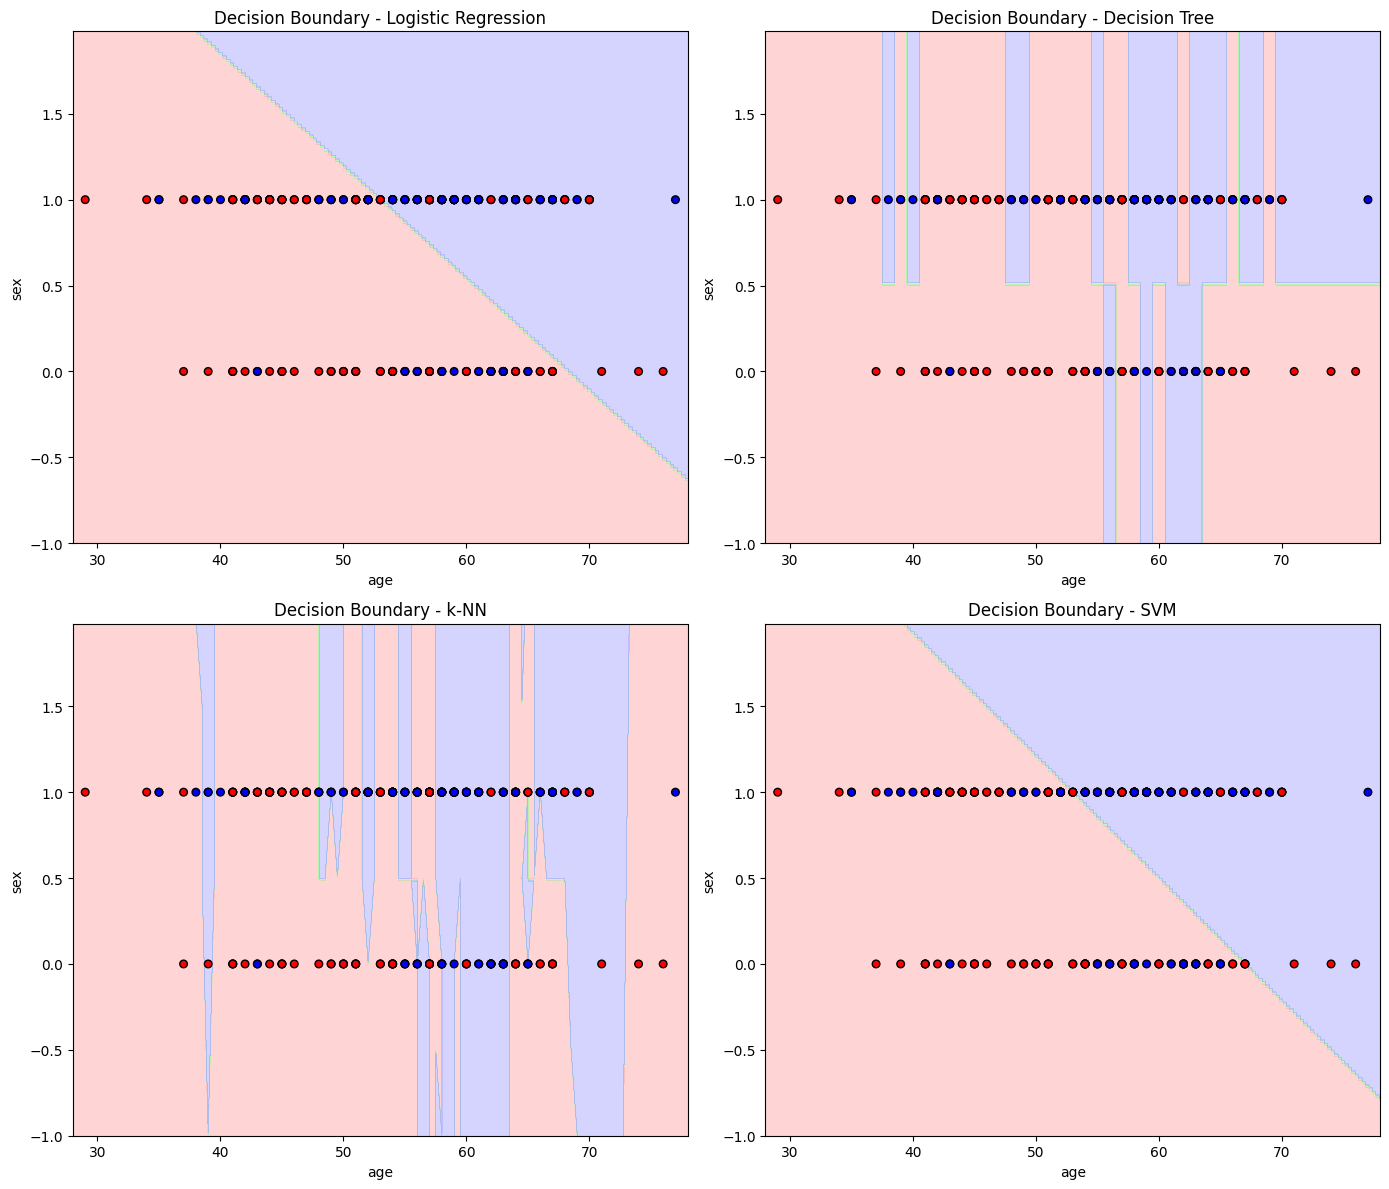

In [123]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_decision_boundary(model, X, y, ax, title):
    # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
    
    # Create mesh grid
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    
    # Predict on mesh grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot contour and training points
    ax.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.5)
    scatter = ax.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=30)
    
    ax.set_title(title)
    ax.set_xlabel(X.columns[0])
    ax.set_ylabel(X.columns[1])

# Plot all models
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

for ax, (name, model) in zip(axes.ravel(), models_2d.items()):
    plot_decision_boundary(model, X_train_2d, y_train, ax, f"Decision Boundary - {name}")

plt.tight_layout()
plt.show()


**another features**

In [128]:
X_train_2d_1 = X_train[['age', 'chol']]
X_test_2d_1 = X_test[['age', 'chol']]

In [129]:
logreg_2d_1 = LogisticRegression(max_iter=1000).fit(X_train_2d_1, y_train)
dtree_2d_1 = DecisionTreeClassifier(random_state=42).fit(X_train_2d_1, y_train)
svm_2d_1 = SVC(kernel='linear', probability=True).fit(X_train_2d_1, y_train)

models_2d_1 = {
    'Logistic Regression': logreg_2d_1,
    'Decision Tree': dtree_2d_1,
    'SVM': svm_2d_1
}

c:\Users\BBY\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\BBY\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\BBY\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


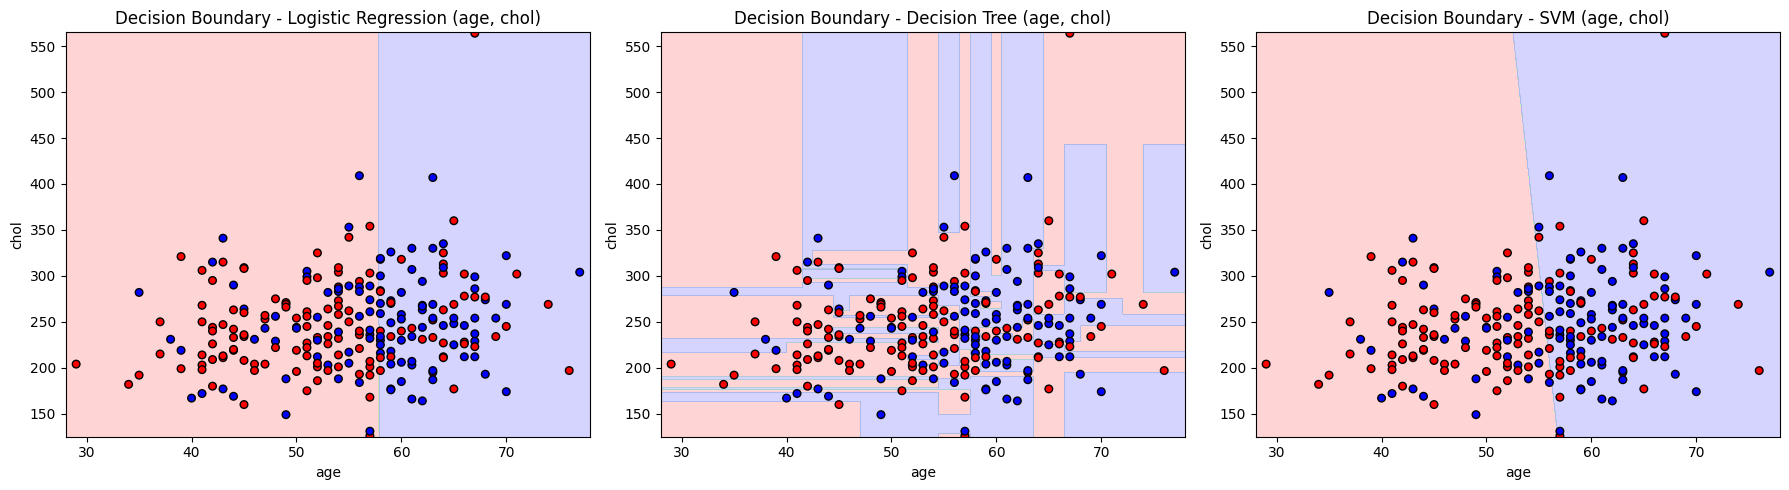

In [130]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_decision_boundary(model, X, y, ax, title):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
    
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    ax.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.5)
    scatter = ax.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=30)
    
    ax.set_title(title)
    ax.set_xlabel(X.columns[0])
    ax.set_ylabel(X.columns[1])

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for ax, (name, model) in zip(axes.ravel(), models_2d_1.items()):
    plot_decision_boundary(model, X_train_2d_1, y_train, ax, f"Decision Boundary - {name} (age, chol)")

plt.tight_layout()
plt.show()
